#### Elaborado por:  YIRLENY ARIAS MENDOZA

#### Cargamos las librerias que necesitamos

In [10]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Abrir datos POR HOJA del excel: CIGEFIdiario2015_with_pcpCIGEFIact.xlsx

In [11]:
data = pd.read_excel('CIGEFI_lluvia_1982_2022.xlsx', 
                     sheet_name='Completo')

In [8]:
data

Año  Mes  Dia  Lluvia
0      1982    1    1     NaN
1      1982    1    2     NaN
2      1982    1    3     NaN
3      1982    1    4     NaN
4      1982    1    5     NaN
...     ...  ...  ...     ...
14970  2022   12   27     0.0
14971  2022   12   28     0.0
14972  2022   12   29     0.0
14973  2022   12   30     0.0
14974  2022   12   31     0.0

[14975 rows x 4 columns]

## Porcentajes de días con lluvia

#### Eliminamos las filas con valores NaN

In [9]:
data1 = data.dropna()

#### Creamos una nueva tabla donde la columna N = Cantidad de dias (con y sin lluvia)
Agrupamos los valores por mes y con .count() contamos los valores

In [10]:
tabla = []
tabla = pd.DataFrame(tabla)
tabla['N'] = data1.groupby('Mes')['Lluvia'].count()#Cantidad de días por mes con valor

#### Creamos un filtro que elimine las filas que tienen un valor de Lluvia < 0.1

In [11]:
n = data1[data1['Lluvia'] > 0.1]

#### Creamos una nueva la columna n = Cantidad de dias con lluvia (lluvia >= 0.1)
Agrupamos los valores por mes y con .count() contamos los valores

In [12]:
tabla['n'] = n.groupby('Mes')['Lluvia'].count()#Cantidad de días por mes con valor mayor o igual a 0.1

#### Creamos una nueva la columna Porcentaje = Porcentaje de dias con lluvia (lluvia >= 0.1)

In [13]:
tabla['Porcentaje'] = (tabla['n']/tabla['N']) * 100

In [14]:
tabla

N     n  Porcentaje
Mes                        
1    1209   138   11.414392
2    1100    88    8.000000
3    1209   120    9.925558
4    1170   302   25.811966
5    1221   798   65.356265
6    1230   906   73.658537
7    1262   822   65.134707
8    1261   880   69.785884
9    1227   992   80.847596
10   1270  1025   80.708661
11   1225   693   56.571429
12   1262   285   22.583201

<IPython.core.display.Javascript object>


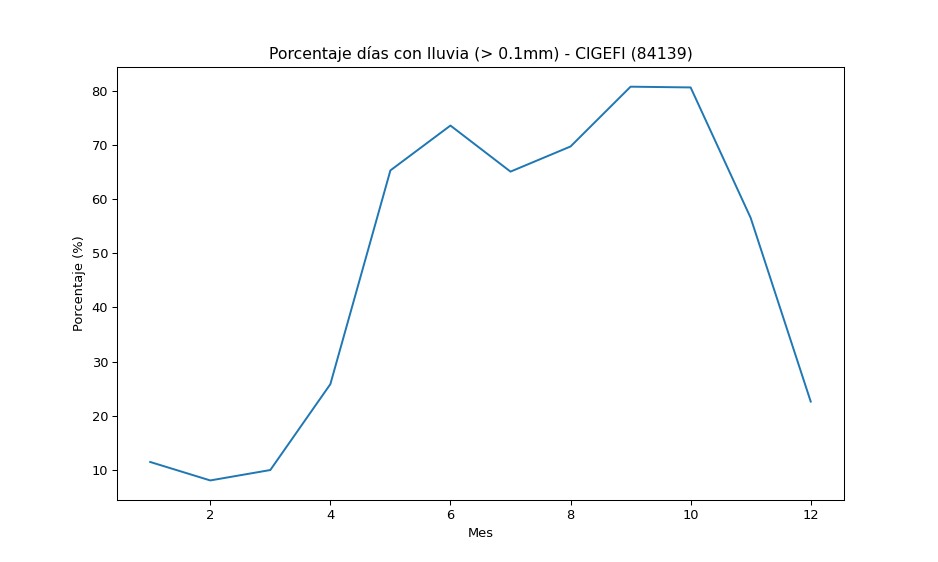

In [15]:
fig = plt.figure(figsize=(10,6))

plt.plot(tabla.index,tabla['Porcentaje'])

plt.title("Porcentaje días con lluvia (> 0.1mm) - CIGEFI (84139)")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Mes")

plt.savefig('porcentaje_lluvia.jpg', dpi = 300, bbox_inches = 'tight')

## Climatología con Desviación Estándar

In [16]:
#Creamos una copia
data2 = data.copy()

#Creamos una nueva columna 'Date' a partir de las columna 'año', 'mes' y 'dia'
data2['Date'] = pd.to_datetime(data2['Año'].astype(str)+'-'+data2['Mes'].astype(str)+'-'+data2['Dia'].astype(str))
data2['Date'] = data2['Date'].astype(str)

#Eliminamos las columnas que no necesitamos
data2.pop('Año')
data2.pop('Mes')
data2.pop('Dia')

0         1
1         2
2         3
3         4
4         5
         ..
14970    27
14971    28
14972    29
14973    30
14974    31
Name: Dia, Length: 14975, dtype: int64

Volvemos la columna 'Date' un DateIndex

In [17]:
data2.Date = pd.to_datetime(data2.Date)
data2.set_index('Date',inplace=True)

Filtramos, por cantidad de días en el mes y por acumulado de lluvia mensual

In [18]:
data_mensual = []
data_mensual = pd.DataFrame(data_mensual)
data_mensual['Cant'] = data2.resample('M').count()
data_mensual['Lluvia'] = data2.resample('M').sum()

Extraer el "mes" del DataIndex

In [19]:
data_mensual['mes'] = (data_mensual.index).month

Filtramos, dejando solo los meses con más de 18 días

In [20]:
data_mensual_new = data_mensual[data_mensual['Cant'] > 18]

In [21]:
data_mensual_new

Cant  Lluvia  mes
Date                         
1982-06-30    30   345.3    6
1982-07-31    31   218.1    7
1982-08-31    31    39.2    8
1982-09-30    30   378.5    9
1982-10-31    31   537.7   10
...          ...     ...  ...
2022-08-31    31   326.7    8
2022-09-30    27   443.4    9
2022-10-31    31   281.4   10
2022-11-30    30   215.4   11
2022-12-31    31     0.6   12

[482 rows x 3 columns]

Obtener el acumulado para la cantidad de días correspondientes del mes

In [22]:
def new_df(data_mensual_new):
    
    if (data_mensual_new['mes'] == 1):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 2):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*28
    elif (data_mensual_new['mes'] == 3):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 4):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*30
    elif (data_mensual_new['mes'] == 5):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 6):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*30
    elif (data_mensual_new['mes'] == 7):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 8):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 9):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*30
    elif (data_mensual_new['mes'] == 10):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    elif (data_mensual_new['mes'] == 11):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*30
    elif (data_mensual_new['mes'] == 12):
        return (data_mensual_new['Lluvia']/data_mensual_new['Cant'])*31
    
data_mensual_new['Lluvia'] = data_mensual_new.apply(new_df, axis = 1)

C:\Users\arias\AppData\Local\Temp\ipykernel_16032\1462898848.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mensual_new['Lluvia'] = data_mensual_new.apply(new_df, axis = 1)


In [23]:
data_mensual_new

Cant      Lluvia  mes
Date                             
1982-06-30    30  345.300000    6
1982-07-31    31  218.100000    7
1982-08-31    31   39.200000    8
1982-09-30    30  378.500000    9
1982-10-31    31  537.700000   10
...          ...         ...  ...
2022-08-31    31  326.700000    8
2022-09-30    27  492.666667    9
2022-10-31    31  281.400000   10
2022-11-30    30  215.400000   11
2022-12-31    31    0.600000   12

[482 rows x 3 columns]

Eliminamos la columna 'Cant', porque ya no la necesitamos

In [24]:
data_mensual_new.pop('Cant')

Date
1982-06-30    30
1982-07-31    31
1982-08-31    31
1982-09-30    30
1982-10-31    31
              ..
2022-08-31    31
2022-09-30    27
2022-10-31    31
2022-11-30    30
2022-12-31    31
Name: Cant, Length: 482, dtype: int64

Obtenemos el 'Promedio' y la 'Desviación Estándar' de la climatología, agrupando por mes

In [25]:
clim_mensual_prcp = []
clim_mensual_prcp = pd.DataFrame(clim_mensual_prcp)

#Obtenemos el 'Promedio' de la climatología, agrupando por mes
clim_mensual_prcp['mean'] = data_mensual_new.groupby(['mes']).mean()

#Obtenemos el 'Desviación Estándar' de la climatología, agrupando por mes
clim_mensual_prcp['desv'] = data_mensual_new.groupby(['mes']).std()

Creamos dos variable, una para 'mas una desviación estándar' y una para 'menos una desviación estándar'

In [26]:
mas = clim_mensual_prcp["mean"] + clim_mensual_prcp["desv"]
menos = clim_mensual_prcp["mean"] - clim_mensual_prcp["desv"]

#### Graficamos

<IPython.core.display.Javascript object>


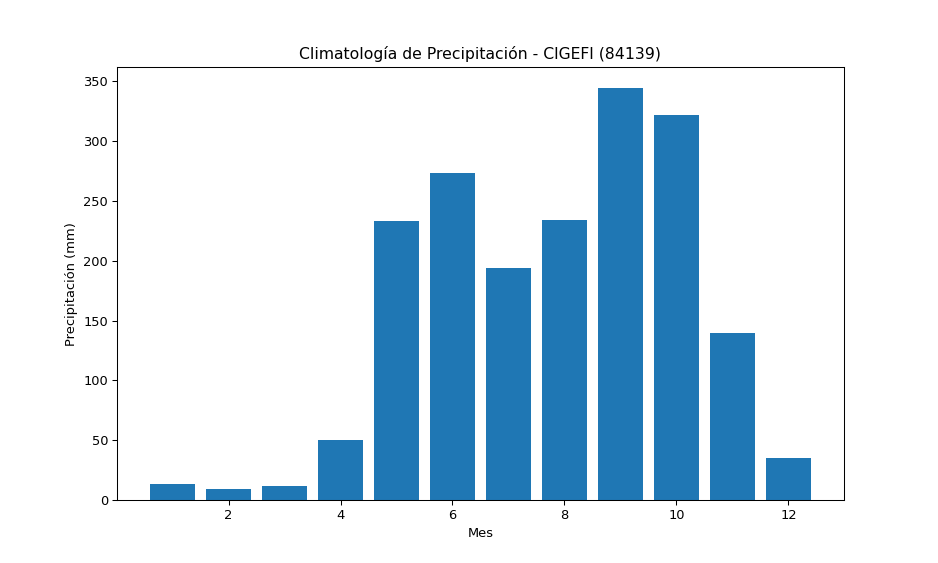

In [27]:
# Gráfico de barras de la climatología de precipitación (mm)
fig, ax = plt.subplots(figsize=[10,6])
ax.bar(clim_mensual_prcp.index,clim_mensual_prcp["mean"])
plt.title("Climatología de Precipitación - CIGEFI (84139)")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Mes")
plt.show()
plt.savefig('climatologia_prcp_bar.jpg', dpi = 300, bbox_inches = 'tight')

<IPython.core.display.Javascript object>


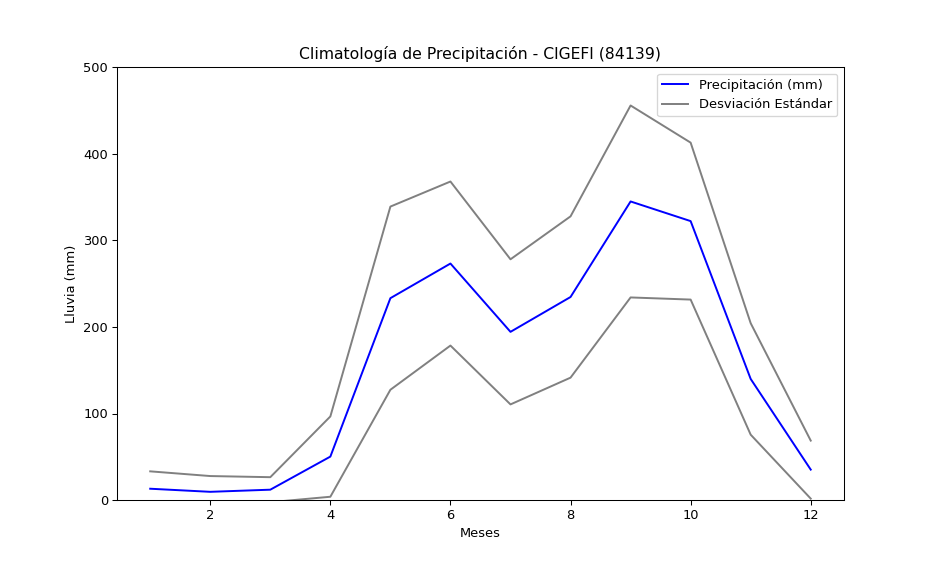

In [28]:
# Creamos el grafico
fig = plt.figure(figsize=(10,6))

plt.plot(clim_mensual_prcp.index, clim_mensual_prcp["mean"], label="Precipitación (mm)", color='blue')
plt.plot(clim_mensual_prcp.index, mas, label="Desviación Estándar", color='gray')
plt.plot(clim_mensual_prcp.index, menos, color='gray')

#Delimitamos el eje y
plt.ylim(0, 500)


# Damos formato
plt.title("Climatología de Precipitación - CIGEFI (84139)")
plt.ylabel("Lluvia (mm)")
plt.xlabel("Meses")

# Mostrar legenda
plt.legend()
plt.savefig('climatologia_prcp.jpg', dpi = 300, bbox_inches = 'tight')

## Acumulado Anual

In [29]:
data_mensual_new.pop('mes')

Date
1982-06-30     6
1982-07-31     7
1982-08-31     8
1982-09-30     9
1982-10-31    10
              ..
2022-08-31     8
2022-09-30     9
2022-10-31    10
2022-11-30    11
2022-12-31    12
Name: mes, Length: 482, dtype: int64

In [30]:
#Creamos un nuevo dataframe
data_anual = []
data_anual = pd.DataFrame(data_anual)

#Agrupamos por año
data_anual['Lluvia'] = data_mensual_new.resample('Y').sum()
data_anual['Cant']= data_mensual_new.resample('Y').count()

Filtramos, dejando solo los años con más de 11 meses

In [31]:
data_anual_new = data_anual[data_anual['Cant'] > 11]

In [32]:
data_anual_new.pop('Cant')

Date
1983-12-31    12
1984-12-31    12
1985-12-31    12
1986-12-31    12
1987-12-31    12
1988-12-31    12
1989-12-31    12
1990-12-31    12
1991-12-31    12
1992-12-31    12
1993-12-31    12
1994-12-31    12
1995-12-31    12
1996-12-31    12
1997-12-31    12
1999-12-31    12
2000-12-31    12
2001-12-31    12
2002-12-31    12
2003-12-31    12
2004-12-31    12
2005-12-31    12
2006-12-31    12
2007-12-31    12
2008-12-31    12
2009-12-31    12
2010-12-31    12
2011-12-31    12
2012-12-31    12
2013-12-31    12
2014-12-31    12
2015-12-31    12
2016-12-31    12
2017-12-31    12
2018-12-31    12
2019-12-31    12
2020-12-31    12
2021-12-31    12
2022-12-31    12
Name: Cant, dtype: int64

Clasificamos los acumulados de los años de forma ascendente

In [33]:
data_anual_sort = data_anual_new.sort_values(by='Lluvia', ascending=True)

### Para encontrar la media

In [34]:
#Vemos la cantidad de años
data_anual_sort.count()

Lluvia    39
dtype: int64

Al tener un numero impar de columnas, es facil obtener el valor de en medio

In [35]:
#Obtenemos el otro valor de en medio
data_anual_sort.iloc[(data_anual_sort.count()/2),:]

Lluvia
Date              
2002-12-31  1799.0

In [36]:
data_anual_sort

Lluvia
Date                   
2001-12-31  1318.628000
2015-12-31  1352.627849
2012-12-31  1356.386207
1986-12-31  1362.700000
1991-12-31  1385.000000
2009-12-31  1485.800000
2018-12-31  1492.300000
2014-12-31  1503.410000
1987-12-31  1541.043333
2019-12-31  1598.000000
1983-12-31  1618.200000
1994-12-31  1656.900000
2006-12-31  1660.000000
2000-12-31  1671.000000
1985-12-31  1678.900000
1990-12-31  1689.100000
2004-12-31  1727.042611
1997-12-31  1738.600000
2016-12-31  1796.210345
2002-12-31  1799.000000
1989-12-31  1817.375333
2013-12-31  1833.010000
1992-12-31  1887.365517
1993-12-31  1905.700000
2021-12-31  1947.700000
2005-12-31  1951.650000
2020-12-31  1971.686552
2011-12-31  1972.500000
1988-12-31  2015.763506
1984-12-31  2074.824138
2007-12-31  2147.500000
1996-12-31  2212.663333
2003-12-31  2231.700000
1999-12-31  2238.200000
2022-12-31  2303.866667
1995-12-31  2348.800000
2010-12-31  2385.300000
2017-12-31  2400.600000
2008-12-31  2809.009310

### Obtenemos los 3 años más secos y los 3 más humedos

In [37]:
#3 años más secos
data_anual_sort.head(3)

Lluvia
Date                   
2001-12-31  1318.628000
2015-12-31  1352.627849
2012-12-31  1356.386207

In [38]:
#3 años más humedos
data_anual_sort.tail(3)

Lluvia
Date                  
2010-12-31  2385.30000
2017-12-31  2400.60000
2008-12-31  2809.00931

### Creamos una copia para proteger los datos anteriores

In [39]:
data3 = data2.copy()

#### Comparación de acumulado anual

Extraer el rango de datos por fecha y reiniciar el indice a su valor determinado

In [40]:
año_2001 = data3[pd.Timestamp('2001-01-01'):pd.Timestamp('2001-12-31')]
año_2015 = data3[pd.Timestamp('2015-01-01'):pd.Timestamp('2015-12-31')]
año_2012 = data3[pd.Timestamp('2012-01-01'):pd.Timestamp('2012-12-31')]
año_2022 = data3[pd.Timestamp('2022-01-01'):pd.Timestamp('2022-12-31')]
año_2010 = data3[pd.Timestamp('2010-01-01'):pd.Timestamp('2010-12-31')]
año_2017 = data3[pd.Timestamp('2017-01-01'):pd.Timestamp('2017-12-31')]
año_2008 = data3[pd.Timestamp('2008-01-01'):pd.Timestamp('2008-12-31')]
año_2002 = data3[pd.Timestamp('2002-01-01'):pd.Timestamp('2002-12-31')]

Crear una lista que contenga todos los años a trabajar

In [41]:
lista_años = [año_2001, año_2015, año_2012, año_2022, año_2010, año_2017, año_2008, año_2002]

Crear una función que el promedio diario-mensual

In [42]:
lista_años_new = []
for i in lista_años:
    año = i.copy()
    año['mes'] = (año.index).month

    ene = (año.loc[(año.index).month == 1 ])
    feb = (año.loc[(año.index).month == 2 ])
    mar = (año.loc[(año.index).month == 3 ])
    abr = (año.loc[(año.index).month == 4 ])
    may = (año.loc[(año.index).month == 5 ])
    jun = (año.loc[(año.index).month == 6 ])
    jul = (año.loc[(año.index).month == 7 ])
    ago = (año.loc[(año.index).month == 8 ])
    set = (año.loc[(año.index).month == 9 ])
    oct = (año.loc[(año.index).month == 10 ])
    nov = (año.loc[(año.index).month == 11 ])
    dic = (año.loc[(año.index).month == 12 ])

    año_new = []
    año_new = pd.DataFrame(año_new)
    def new_df(año):

        if (año['mes'] == 1):
            return año.fillna(ene.sum()/ene.count())
        elif (año['mes'] == 2):
            return año.fillna(feb.sum()/feb.count())
        elif (año['mes'] == 3):
            return año.fillna(mar.sum()/mar.count())
        elif (año['mes'] == 4):
            return año.fillna(abr.sum()/abr.count())
        elif (año['mes'] == 5):
            return año.fillna(may.sum()/may.count())
        elif (año['mes'] == 6):
            return año.fillna(jun.sum()/jun.count())
        elif (año['mes'] == 7):
            return año.fillna(jul.sum()/jul.count())
        elif (año['mes'] == 8):
            return año.fillna(ago.sum()/ago.count())
        elif (año['mes'] == 9):
            return año.fillna(set.sum()/set.count())
        elif (año['mes'] == 10):
            return año.fillna(oct.sum()/oct.count())
        elif (año['mes'] == 11):
            return año.fillna(nov.sum()/nov.count())
        elif (año['mes'] == 12):
            return año.fillna(dic.sum()/dic.count())

    año_new = año.apply(new_df, axis = 1)
    año_new = año_new.reset_index()
    año_new.pop('Date')
    año_new.pop('mes')
    lista_años_new.append(año_new)

In [43]:
lista_años_new

[     Lluvia
 0       0.0
 1       2.2
 2      12.9
 3       0.0
 4       0.0
 ..      ...
 360     0.0
 361     0.0
 362     0.0
 363    10.2
 364     0.7
 
 [365 rows x 1 columns],
      Lluvia
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 ..      ...
 360     0.0
 361     0.0
 362     0.0
 363     0.0
 364     0.0
 
 [365 rows x 1 columns],
      Lluvia
 0       0.0
 1       0.0
 2       0.0
 3       3.2
 4       1.0
 ..      ...
 361     0.0
 362     0.0
 363     0.0
 364     0.0
 365     0.0
 
 [366 rows x 1 columns],
      Lluvia
 0       0.0
 1       0.0
 2       0.1
 3       0.4
 4       0.0
 ..      ...
 360     0.0
 361     0.0
 362     0.0
 363     0.0
 364     0.0
 
 [365 rows x 1 columns],
      Lluvia
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 ..      ...
 360     0.0
 361     0.2
 362     0.4
 363     5.8
 364     0.0
 
 [365 rows x 1 columns],
      Lluvia
 0       0.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
 ..    

Seleccionamos la columna con los datos de lluvia

In [44]:
for i, df in enumerate(lista_años_new):
    lista_años_new[i] = lista_años_new[i].iloc[:,0]

Lo volvemos un dataframe

In [45]:
años = pd.DataFrame(lista_años_new)

Transponemos el dataframe

In [46]:
años = años.T

Se le da nombre a las columnas

In [47]:
años.columns = ['2001', '2015', '2012', '2022', '2010', '2017', '2008', '2002']

Aplicar la funcion .cumsum() de pandas, que devuelve un DataFrame del mismo tamaño que contiene la suma acumulada.

In [48]:
años = años.cumsum()

Como hay años con 366 dias, utilizar fillna() para rellenar

In [49]:
años_new = años.fillna(method='ffill')

In [50]:
años_new

2001    2015    2012         2022    2010    2017     2008    2002
0       0.000     0.0     0.0     0.000000     0.0     0.0     0.00     0.0
1       2.200     0.0     0.0     0.000000     0.0     0.0     0.10     0.2
2      15.100     0.0     0.0     0.100000     0.0     0.0     0.10     0.2
3      15.100     0.0     3.2     0.500000     0.0     0.0     0.10     0.2
4      15.100     0.0     4.2     0.500000     0.0     0.0     0.10     0.2
..        ...     ...     ...          ...     ...     ...      ...     ...
361  1307.728  1345.8  1356.5  2303.866667  2379.1  2396.1  2809.13  1799.0
362  1307.728  1345.8  1356.5  2303.866667  2379.5  2397.7  2809.13  1799.0
363  1317.928  1345.8  1356.5  2303.866667  2385.3  2398.5  2809.13  1799.0
364  1318.628  1345.8  1356.5  2303.866667  2385.3  2400.6  2809.13  1799.0
365  1318.628  1345.8  1356.5  2303.866667  2385.3  2400.6  2809.13  1799.0

[366 rows x 8 columns]

### Graficar

Opción 1

<IPython.core.display.Javascript object>


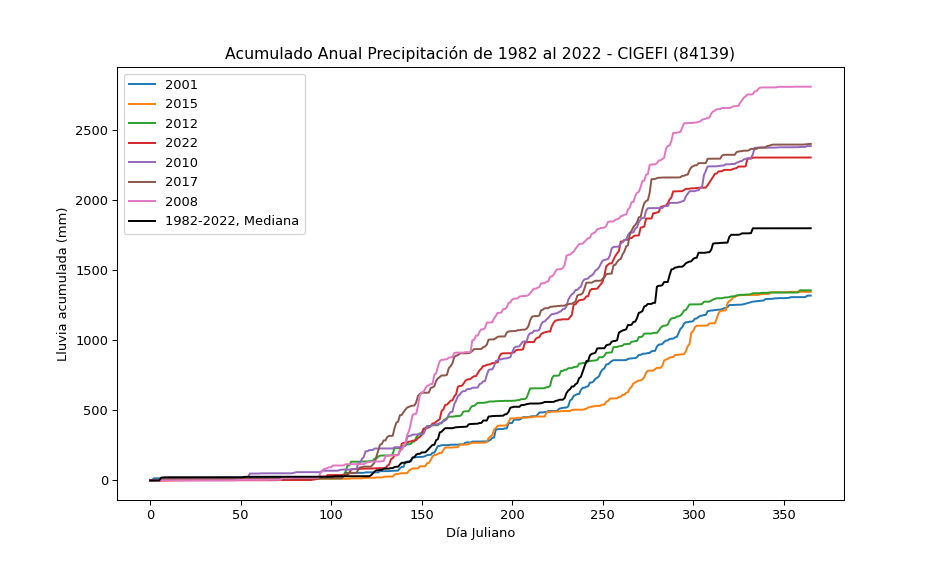

In [51]:
#Creamos el grafico
fig = plt.figure(figsize=(10,6))

plt.plot(años_new.index, años_new['2001'], label="2001")
plt.plot(años_new.index, años_new['2015'], label="2015")
plt.plot(años_new.index, años_new['2012'], label="2012")
plt.plot(años_new.index, años_new['2022'], label="2022")
plt.plot(años_new.index, años_new['2010'], label="2010")
plt.plot(años_new.index, años_new['2017'], label="2017")
plt.plot(años_new.index, años_new['2008'], label="2008")
plt.plot(años_new.index, años_new['2002'], label="1982-2022, Mediana", color="black")


#Damos formato
plt.title("Acumulado Anual Precipitación de 1982 al 2022 - CIGEFI (84139)")
plt.ylabel("Lluvia acumulada (mm)")
plt.xlabel("Día Juliano")

#Mostramos la leyenda
plt.legend()
plt.savefig('acumulado_anual_1_new.jpg', dpi = 300, bbox_inches = 'tight')

Opción 2

<IPython.core.display.Javascript object>


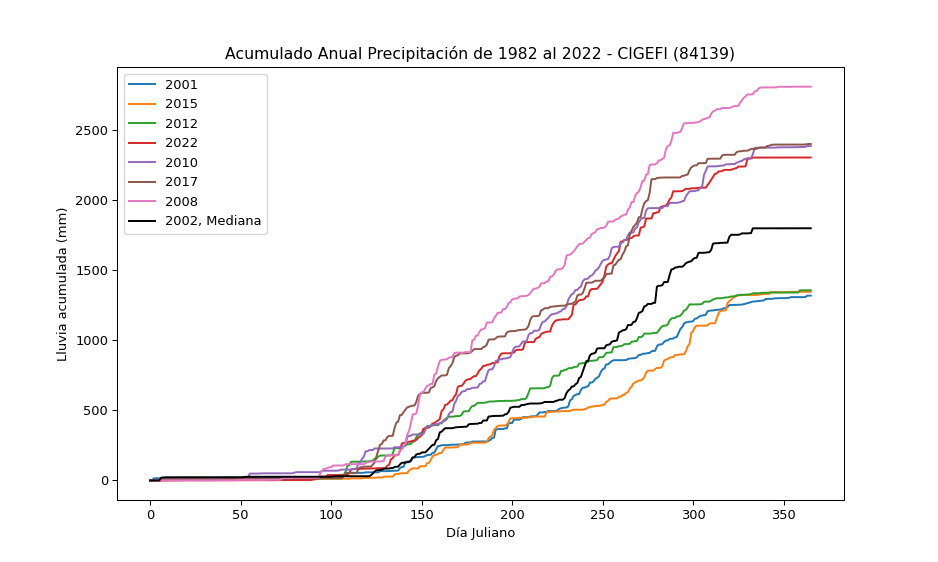

In [52]:
#Creamos el grafico
fig = plt.figure(figsize=(10,6))

plt.plot(años_new.index, años_new['2001'], label="2001")
plt.plot(años_new.index, años_new['2015'], label="2015")
plt.plot(años_new.index, años_new['2012'], label="2012")
plt.plot(años_new.index, años_new['2022'], label="2022")
plt.plot(años_new.index, años_new['2010'], label="2010")
plt.plot(años_new.index, años_new['2017'], label="2017")
plt.plot(años_new.index, años_new['2008'], label="2008")
plt.plot(años_new.index, años_new['2002'], label="2002, Mediana", color="black")


#Damos formato
plt.title("Acumulado Anual Precipitación de 1982 al 2022 - CIGEFI (84139)")
plt.ylabel("Lluvia acumulada (mm)")
plt.xlabel("Día Juliano")

#Mostramos la leyenda
plt.legend()
plt.savefig('acumulado_anual_2_new.jpg', dpi = 300, bbox_inches = 'tight')

In [53]:
# Crear el objeto ExcelWriter
writer = pd.ExcelWriter('Summary_Acumulado_Anual_CIGEFI_Datos_Diarios.xlsx', engine='xlsxwriter')

# Escribir los DataFrames en diferentes hojas
tabla.to_excel(writer, sheet_name='dias_with_lluvia', index=False)
clim_mensual_prcp.to_excel(writer, sheet_name='clim_lluvia', index=False)
años_new.to_excel(writer, sheet_name='acumulado', index=False)

# Guardar el archivo Excel
writer.save()